In [138]:
import seaborn as sns
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt

## Exercises 1

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
62,6.0,2.2,4.0,1.0,versicolor
65,6.7,3.1,4.4,1.4,versicolor
23,5.1,3.3,1.7,0.5,setosa
33,5.5,4.2,1.4,0.2,setosa
85,6.0,3.4,4.5,1.6,versicolor
97,6.2,2.9,4.3,1.3,versicolor
18,5.7,3.8,1.7,0.3,setosa
13,4.3,3.0,1.1,0.1,setosa
11,4.8,3.4,1.6,0.2,setosa
101,5.8,2.7,5.1,1.9,virginica


In [10]:
data('iris', show_doc = True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

### 1. What does the distribution of petal lengths look like?

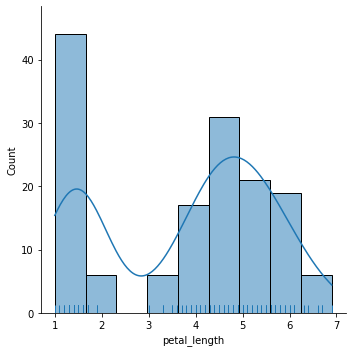

In [92]:
sns.displot(iris.petal_length, kde = True, rug = True)

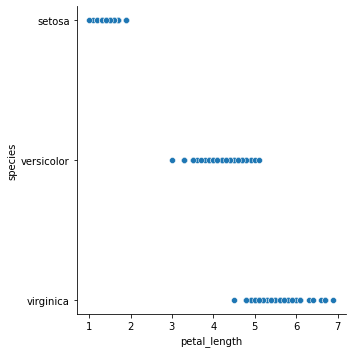

In [104]:
sns.relplot(data = iris, x = 'petal_length', y = 'species')

<AxesSubplot:xlabel='species', ylabel='petal_length'>

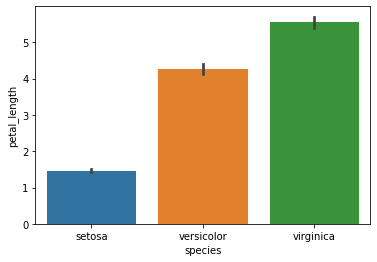

In [18]:
sns.barplot(data = iris, x = 'species', y = 'petal_length')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


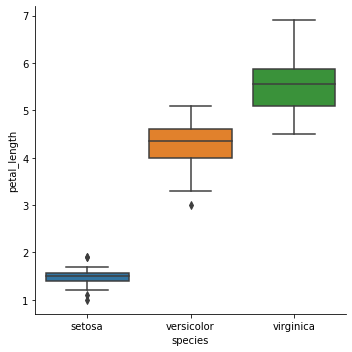

In [95]:
sns.catplot(data = iris, x = 'species', y = 'petal_length', kind = 'box', size = 5)

### 2. Is there a correlation between petal length and petal width? 

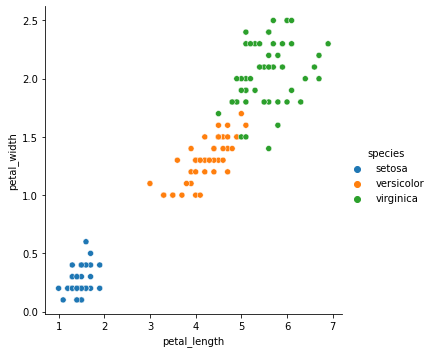

In [105]:
sns.relplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species')

# Yes, there is a correlation between the petals length and their width. At approx 85 to 90%,
# petal length increase corresponds to increase in petal witdth and it is at a different proportion,
# depending on the species although versicolor is closer to virginica

### 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

In [21]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,setosa
127,6.1,3.0,4.9,1.8,virginica
78,6.0,2.9,4.5,1.5,versicolor
105,7.6,3.0,6.6,2.1,virginica
148,6.2,3.4,5.4,2.3,virginica
40,5.0,3.5,1.3,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
104,6.5,3.0,5.8,2.2,virginica
138,6.0,3.0,4.8,1.8,virginica
130,7.4,2.8,6.1,1.9,virginica


In [22]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

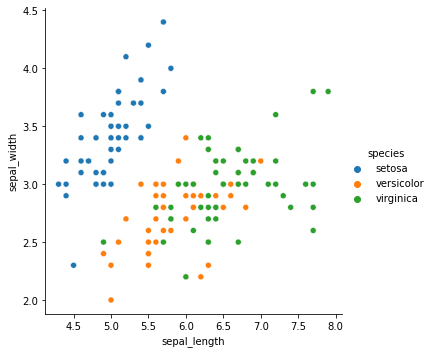

In [107]:
sns.relplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')

# The correlation in sepal_length and sepal_width is much lower but still fairly
# distinct between setosa on one side and versicolor and virginica on the other side

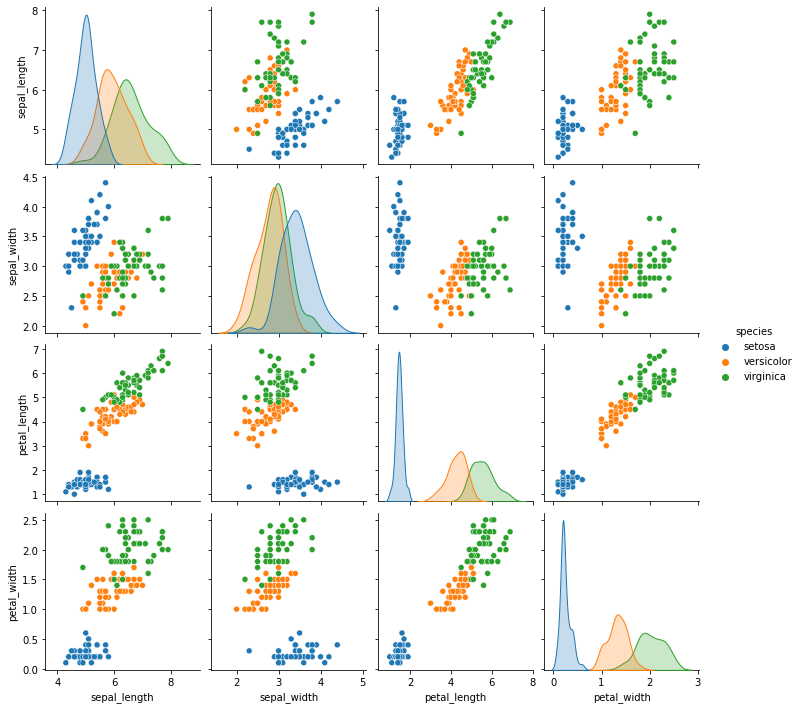

In [108]:
sns.pairplot(iris, hue = 'species')

### 4. Which features would be best used to predict species?

- The petal width and their length seems to be the best way to distinguish these species from each other

## Exerscises 2

### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [33]:
anscombe = sns.load_dataset('anscombe')

In [34]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [38]:
anscombe.columns

Index(['dataset', 'x', 'y'], dtype='object')

In [39]:
anscombe.shape

(44, 3)

In [109]:
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [125]:
type(anscombe)

pandas.core.frame.DataFrame

In [128]:
summary = anscombe.groupby('dataset').describe().T
summary

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

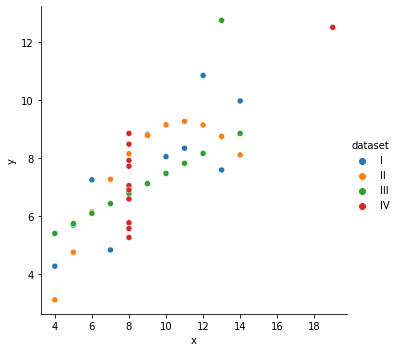

In [127]:
sns.relplot(data = anscombe, x = 'x', y = 'y', hue = 'dataset')

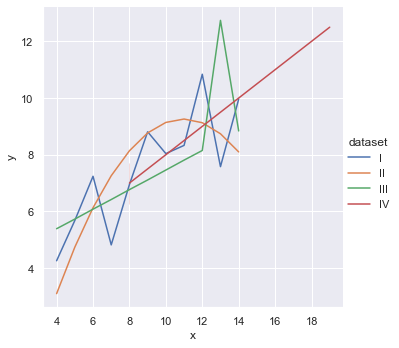

<Figure size 2160x1512 with 0 Axes>

In [142]:
sns.set_theme()
sns.relplot(data = anscombe, x = 'x', y = 'y', kind = 'line', hue = 'dataset')
fig = plt.figure(figsize = (30, 21)) # Why isn't this working?

### 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [149]:
InsectSprays = sns.load_dataset('InsectSprays')

ValueError: 'InsectSprays' is not one of the example datasets.

In [148]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']
